<a href="https://colab.research.google.com/github/nourlbd/projet_data_tools/blob/main/Scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# **Scrapping du site sens-critique**


In [174]:
url='https://www.senscritique.com/films/tops/top100-des-top10'

## **Obtenir les titres**

In [175]:
def get_title(link):
    html = requests.get(url)
    soup = BeautifulSoup(html.text)
    all_title=[]
    all_title_div = soup.find_all("h2", { "class" : "d-heading2 elco-title"})
    for liste in all_title_div:
        title=(liste.a.text)
        all_title.append(title)
    return all_title


In [176]:
all_title=get_title(url)

## **Obtenir les réalisateur**

In [177]:
def get_director(link):
    all_director=[]
    html = requests.get(url)
    soup = BeautifulSoup(html.text)
    all_direc_div = soup.find_all("p", { "class" : "elco-baseline"})
    for director_l in all_direc_div:
        director=(director_l.span.text)
        all_director.append(director)
               
    return all_director

In [178]:
all_director=get_director(url)

In [179]:
all_director = [elt for idx, elt in enumerate(all_director) if idx % 2 != 0]


## **Obtenir les liens des films**

In [180]:
def get_link_film(link):
    all_link_f=[]
    html = requests.get(link)
    soup = BeautifulSoup(html.text)
    all_link_f_div = soup.find_all("h2", { "class" : "d-heading2 elco-title"})
    for link_f in all_link_f_div:
        link=(link_f.a["href"])
        all_link_f.append(link)
    all_url_f=[]
    i=0
    while i < len(all_link_f):
        all_url_f.append("https://www.senscritique.com"+all_link_f[i])
        i+=1
      
    return all_url_f         
    

In [181]:
all_url_f=get_link_film(url)

## **Obtenir les notes**

In [182]:
def get_rate(link):
    all_rate=[]
    for links in link:
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
       
        all_rate_div = soup.find_all("div", { "class" : "pvi-product-scrating"})
        for rate_l in all_rate_div:
            rate=(rate_l.span.text)
            all_rate.append(rate)
               
    return all_rate

In [183]:
all_rate=get_rate(all_url_f)

In [184]:
for i in range(0,len(all_rate)):
  all_rate[i]=float(all_rate[i])

print(all_rate)

[8.2, 8.3, 7.9, 8.0, 7.9, 8.5, 8.0, 8.1, 8.0, 8.5, 7.5, 8.0, 8.3, 8.0, 8.4, 7.8, 8.1, 8.1, 7.7, 8.4, 7.8, 8.0, 8.7, 8.5, 8.4, 8.1, 7.6, 7.3, 8.2, 8.1, 7.4, 8.5, 8.1, 7.8, 8.1, 7.8, 7.8, 7.8, 8.1, 8.0, 7.7, 7.9, 7.9, 7.7, 7.6, 7.9, 7.6, 7.4, 7.9, 7.8, 7.8, 7.2, 7.8, 7.7, 7.4, 7.1, 8.1, 7.8, 7.6, 7.5, 7.9, 8.3, 6.8, 7.2, 7.6, 8.2, 7.1, 7.3, 7.7, 7.6, 7.6, 7.7, 8.2, 8.5, 8.0, 8.0, 8.0, 8.3, 8.1, 7.7, 7.8, 7.5, 8.0, 7.5, 7.4, 7.9, 8.3, 8.0, 7.7, 7.5, 8.0, 7.7, 7.2, 7.7, 7.8, 7.8, 6.3, 7.0, 7.6, 7.0]


## **Obtenir les genres**

In [185]:
def get_genres(link):
    all_genres=[]
    for links in link:
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
        all_genre_div = soup.find_all("a", { "class" : "lahe-breadcrumb-anchor"})[2].text
        all_genres.append(all_genre_div) 
        
    return all_genres

In [186]:
all_genres=get_genres(all_url_f)

## **Obtenir les dates de sortie**

In [187]:
def get_date(link):
    all_date=[]
    for links in link:
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
        all_date_div = soup.find("small", { "class" : "pvi-product-year"}).text
        all_date_div=str(all_date_div)[1:-1]
        all_date.append(all_date_div) 
        
    return all_date

In [188]:
all_date=get_date(all_url_f)

## **Obtenir les acteurs**

In [189]:
def get_actors(link):
    all_actor_f=[]
    for links in link:
        all_actor=[]
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
        all_actor_div1 = soup.find_all("span", { "class" : "d-offset ecot-contact-label"})[0].text
        all_actor_div2 = soup.find_all("span", { "class" : "d-offset ecot-contact-label"})[1].text
        all_actor_div3 = soup.find_all("span", { "class" : "d-offset ecot-contact-label"})[2].text
        all_actor.append(all_actor_div1)
        all_actor.append(all_actor_div2) 
        all_actor.append(all_actor_div3)
        all_actor_f.append(all_actor)
       
    return all_actor_f

In [190]:
all_actor=get_actors(all_url_f)

## **Obtenir la durée des film**

In [191]:
def get_duree(link):
    all_duree=[]
    for links in link:
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
        all_duree_div = soup.find_all("li", { "class" : "pvi-productDetails-item"})[2].text[7:-9]
        all_duree.append(all_duree_div)
       
    return all_duree

In [192]:
all_duree=get_duree(all_url_f)

## **Obtenir la description**

In [193]:
def get_description(link):
    all_des=[]
    for links in link:
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
        all_des_div = soup.find("p", { "class" : "pvi-productDetails-resume"}).text[5:-24]
        all_des.append(all_des_div)
        
    return all_des

In [194]:
all_description=get_description(all_url_f)

## **Création du dataset**

In [195]:
df_2 = pd.DataFrame({"titre": all_title, "date": all_date,"rate":all_rate, "lien":all_url_f,"réalisateur":all_director,"genres":all_genres,"durée":all_duree,"acteur":all_actor,"description":all_description})

In [196]:
df_2

,titre,date,rate,lien,réalisateur,genres,durée,acteur,description
0,Fight Club,1999,8.2,https://www.senscritique.com/film/Fight_Club/3...,David Fincher,Drame,2 h 19,"[Edward Norton, Brad Pitt, Helena Bonham Carter]","Insomniaque, désillusionné par sa vie personne..."
1,Pulp Fiction,1994,8.3,https://www.senscritique.com/film/Pulp_Fiction...,Quentin Tarantino,Gangster,2 h 34,"[John Travolta, Samuel L. Jackson, Ving Rhames]","L'odyssée sanglante, burlesque et cocasse de p..."
2,Interstellar,2014,7.9,https://www.senscritique.com/film/Interstellar...,Christopher Nolan,Aventure,2 h 49,"[Matthew McConaughey, Anne Hathaway, Jessica C...",Un groupe d'explorateurs exploite une faille d...
3,2001 : L'Odyssée de l'espace,1968,8.0,https://www.senscritique.com/film/2001_L_Odyss...,Stanley Kubrick,Aventure,2 h 40,"[Keir Dullea, Gary Lockwood, William Sylvester]","A l'aube de l'Humanité, dans le désert africai..."
4,Blade Runner,1982,7.9,https://www.senscritique.com/film/Blade_Runner...,Ridley Scott,Science-fiction,1 h 57,"[Harrison Ford, Rutger Hauer, Sean Young]","2019, Los Angeles. La Terre est surpeuplée et ..."
...,...,...,...,...,...,...,...,...,...
95,L'Armée des 12 singes,1995,7.8,https://www.senscritique.com/film/L_Armee_des_...,Terry Gilliam,Science-fiction,2 h 09,"[Bruce Willis, Madeleine Stowe, Brad Pitt]","En 1997, décimée par un mystérieux virus, l'hu..."
96,The Tree of Life,2011,6.3,https://www.senscritique.com/film/The_Tree_of_...,Terrence Malick,Drame,2 h 19,"[Brad Pitt, Sean Penn, Jessica Chastain]",Jack vient de perdre son frère. Devant cette f...
97,Cloud Atlas,2012,7.0,https://www.senscritique.com/film/Cloud_Atlas/...,Lilly Wachowski,Aventure,2 h 52,"[Tom Hanks, Halle Berry, Jim Broadbent]",L'histoire se déroule sur 5 siècles dans plusi...
98,Les Fils de l'homme,2006,7.6,https://www.senscritique.com/film/Les_Fils_de_...,Alfonso Cuarón,Drame,1 h 49,"[Clive Owen, Julianne Moore, Clare-Hope Ashitey]","En 2027, aucun enfant n'est venu au monde depu..."


## **Visualisation**

In [197]:
import plotly.express as px

print(px.colors.qualitative.G10)
print(px.colors.qualitative.Pastel1)
print(px.colors.qualitative.Prism)
print(px.colors.qualitative.Alphabet)


['#3366CC', '#DC3912', '#FF9900', '#109618', '#990099', '#0099C6', '#DD4477', '#66AA00', '#B82E2E', '#316395']
['rgb(251,180,174)', 'rgb(179,205,227)', 'rgb(204,235,197)', 'rgb(222,203,228)', 'rgb(254,217,166)', 'rgb(255,255,204)', 'rgb(229,216,189)', 'rgb(253,218,236)', 'rgb(242,242,242)']
['rgb(95, 70, 144)', 'rgb(29, 105, 150)', 'rgb(56, 166, 165)', 'rgb(15, 133, 84)', 'rgb(115, 175, 72)', 'rgb(237, 173, 8)', 'rgb(225, 124, 5)', 'rgb(204, 80, 62)', 'rgb(148, 52, 110)', 'rgb(111, 64, 112)', 'rgb(102, 102, 102)']
['#AA0DFE', '#3283FE', '#85660D', '#782AB6', '#565656', '#1C8356', '#16FF32', '#F7E1A0', '#E2E2E2', '#1CBE4F', '#C4451C', '#DEA0FD', '#FE00FA', '#325A9B', '#FEAF16', '#F8A19F', '#90AD1C', '#F6222E', '#1CFFCE', '#2ED9FF', '#B10DA1', '#C075A6', '#FC1CBF', '#B00068', '#FBE426', '#FA0087']


In [198]:
import plotly.express as px
data = px.data.gapminder()


fig = px.bar(df_2, x=df_2["genres"].value_counts().index, y=df_2["genres"].value_counts().values,
             color=['#3366CC', '#DC3912', '#FF9900', '#109618', '#990099', '#0099C6', '#DD4477', '#66AA00', '#B82E2E', '#316395','rgb(251,180,174)', 'rgb(179,205,227)', 'rgb(204,235,197)', 'rgb(222,203,228)', 'rgb(254,217,166)', 'rgb(255,255,204)', 'rgb(229,216,189)', 'rgb(253,218,236)', 'rgb(242,242,242)','rgb(95, 70, 144)']
             )
fig.update_layout(title_text='Genres')
fig.show()

In [199]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`

fig = px.pie(df_2, values=df_2['genres'].value_counts(), names=df_2["genres"].value_counts().index,color_discrete_sequence=px.colors.sequential.Plasma_r)
fig.update_layout(title_text='Pourcentage de chaque genres')
fig.show()

In [200]:
import plotly.express as px
data = px.data.gapminder()


fig = px.bar(df_2, x=df_2["réalisateur"].value_counts().index, y=df_2["réalisateur"].value_counts().values,
          color= df_2["réalisateur"].value_counts().index
             )
fig.update_layout(title_text='Réalisateur')
fig.show()

In [201]:
list_all_actor_value=[]
for i in range(0,100):
  for j in range(0,3):
    c=df_2["acteur"][i][j]
    list_all_actor_value.append(c)


In [202]:
df_actor_2 = pd.DataFrame({"acteur": list_all_actor_value})

In [203]:
nbr_actor_values=[]
nbr_actor_index=[]
for i in range(0,100):
    c=df_actor_2["acteur"].value_counts().values[i]
    j=df_actor_2["acteur"].value_counts().index[i]

    if c > 1:
      nbr_actor_values.append(c)
      nbr_actor_index.append(j)
    
      

In [204]:
import plotly.express as px
data = px.data.gapminder()


fig = px.bar(df_2, x=nbr_actor_index, y=nbr_actor_values,
            color=nbr_actor_index
             
             )
fig.update_layout(title_text='Acteur famous')
fig.show()

In [205]:
import plotly.express as px
fig = px.scatter(df_2, x=df_2["date"], y=df_2["rate"],color=df_2["titre"])
fig.update_layout(title_text='Classement des films en fonction des dates de sortie et de leur notes')
fig.show()

# **Scrapping du site imdb**

In [206]:
url='https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=DXK1EZW4ERJKM9CNKEVD&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=moviemeter&ref_=chtmvm_ql_3'

## **Obtenir les titres**


In [207]:
def get_title(link):
    html = requests.get(url)
    soup = BeautifulSoup(html.text)
    all_title=[]
    all_title_div = soup.find_all("td", { "class" : "titleColumn"})
    for liste in all_title_div:
        title=(liste.a.text)
        all_title.append(title)
    return all_title


In [208]:
all_title=get_title(url)

In [209]:
all_title=all_title[:100]

In [210]:
len(all_title)

100

## **Obtenir les dates**

In [211]:
def get_date(link):
    html = requests.get(url)
    soup = BeautifulSoup(html.text)
    all_date=[]
    all_date_div = soup.find_all("td", { "class" : "titleColumn"})
    for date_l in all_date_div:
        date=(date_l.span.text)
        all_date.append(date)
    return all_date


In [212]:
all_date=get_date(url)

In [213]:
all_date=all_date[:100]

In [214]:
len(all_date)

100

## **Obtenir les notes**

In [215]:
def get_rate(link):
    html = requests.get(url)
    soup = BeautifulSoup(html.text)
    all_rate=[]
    all_rate_div = soup.find_all("td", { "class" : "ratingColumn imdbRating"})
    for rate_l in all_rate_div:
        rate=(rate_l.strong.text)
        all_rate.append(rate)
    return all_rate

In [216]:
all_rate=get_rate(url)

In [217]:
all_rate=all_rate[:100]

## **Obtenir tous les liens des films**

In [218]:
def get_link(link):
    html = requests.get(url)
    soup = BeautifulSoup(html.text)
    all_link=[]
    all_link_div = soup.find_all("td", { "class" : "titleColumn"})
    for link_l in all_link_div:
        link=(link_l.a["href"])
        all_link.append(link)
    all_link=all_link[:100]
    all_url=[]
    i=0
    while i < len(all_link):
        all_url.append("https://www.imdb.com"+all_link[i])
        i+=1

    return all_url

In [219]:
all_url=get_link(url)

In [220]:
len(all_url)

100

## **Obtenir tous les réalisateur**

In [221]:
def get_director(link):
    all_director=[]
    for links in link:
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
       
        all_direc_div = soup.find_all("a", { "class" : "ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"})[0].text
        all_director.append(all_direc_div)
        
    return all_director

In [222]:
all_director=get_director(all_url)

In [223]:
len(all_director)

100

## **Obtenir tous les genres**

In [224]:
def get_genres(link):
    all_genres=[]
    for links in link:
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
        all_genre_div = soup.find_all("span", { "class" : "ipc-chip__text"})[0].text
       
        all_genres.append(all_genre_div)
        
    return all_genres

In [225]:
all_genres=get_genres(all_url)

In [226]:
len(all_genres)

100

## **Obtenir le budget**

In [227]:
pip install scrapy

In [228]:
def get_budget(link):
    from scrapy import Selector
    all_budget=[]
    for links in link:
        res = requests.get(links)
        sel = Selector(res)
        budget = ' '.join(sel.css(".txt-block:contains('Budget')::text").extract()).strip()
        all_budget.append(budget)
    return all_budget

In [229]:
all_budget=get_budget(all_url)

In [230]:
len(all_budget)

100

## **Obtenir la durée des films**

In [231]:
def get_time(link):
    import re
    all_time=[]
    for links in link:
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
        all_time_div = soup.find_all("li",{"class":"ipc-inline-list__item"})[2].text
        all_time.append(all_time_div)
        
    i=0
    all_time2=[]
    all_time3=[]
    while i < len(all_time):
        s=all_time[i]
        regex = re.compile(r'[\n\r\t]')
        s = regex.sub(" ", s)
        all_time2.append(s)
        j=all_time2[i].replace(" ","")
        all_time3.append(j)
        i+=1        
    return all_time3

In [232]:
all_time=get_time(all_url)

In [233]:
len(all_time)

100

## **Obtenir tous les acteurs principaux**

In [234]:
def get_actors(link):
    all_actor_f=[]
    for links in link:
        all_actor=[]
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
        all_actor_div1 = soup.find_all("a", { "class" : "ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"})[3].text
        all_actor_div2 = soup.find_all("a", { "class" : "ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"})[4].text
        all_actor_div3 = soup.find_all("a", { "class" : "ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"})[5].text
        all_actor.append(all_actor_div1)
        all_actor.append(all_actor_div2) 
        all_actor.append(all_actor_div3)
        all_actor_f.append(all_actor)
        
       
    return all_actor_f

In [235]:
all_actor=get_actors(all_url)

In [236]:
len(all_actor)

100

## **Obtenir les description**

In [237]:
def get_des(link):
    all_des=[]
    for links in link:
        html = requests.get(links)
        soup = BeautifulSoup(html.text)
        all_des_div = soup.find_all("div", { "class" : "GenresAndPlot__TextContainerBreakpointM-cum89p-2 iJnWgZ"})
        for liste_des in all_des_div:
                des=(liste_des.text)
                all_des.append(des)
                
    return all_des

In [238]:
all_des=get_des(all_url)

In [239]:
len(all_des)

100

## **Création du dataset**

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [241]:
df = pd.DataFrame({"titre": all_title, "date": all_date,"rate":all_rate, "lien":all_url,"réalisateur":all_director,"genres":all_genres,"durée":all_time,"acteur":all_actor,"budget":all_budget,"description":all_des})

In [242]:
df

,titre,date,rate,lien,réalisateur,genres,durée,acteur,budget,description
0,The Shawshank Redemption,(1994),9.2,https://www.imdb.com/title/tt0111161/,Frank Darabont,Drama,2h22min,"[Tim Robbins, Morgan Freeman, Bob Gunton]",,Two imprisoned men bond over a number of years...
1,The Godfather,(1972),9.1,https://www.imdb.com/title/tt0068646/,Francis Ford Coppola,Crime,2h55min,"[Marlon Brando, Al Pacino, James Caan]",,An organized crime dynasty's aging patriarch t...
2,The Godfather: Part II,(1974),9.0,https://www.imdb.com/title/tt0071562/,Francis Ford Coppola,Crime,3h22min,"[Al Pacino, Robert De Niro, Robert Duvall]",,The early life and career of Vito Corleone in ...
3,The Dark Knight,(2008),9.0,https://www.imdb.com/title/tt0468569/,Christopher Nolan,Action,2h32min,"[David S. Goyer, Christian Bale, Heath Ledger]",,When the menace known as the Joker wreaks havo...
4,12 Angry Men,(1957),8.9,https://www.imdb.com/title/tt0050083/,Sidney Lumet,Crime,1h36min,"[Lee J. Cobb, Martin Balsam, Sidney Lumet]",,A jury holdout attempts to prevent a miscarria...
...,...,...,...,...,...,...,...,...,...,...
95,Singin' in the Rain,(1952),8.3,https://www.imdb.com/title/tt0045152/,Stanley Donen,Comedy,1h43min,"[Adolph Green, Gene Kelly, Donald O'Connor]",,A silent film production company and cast make...
96,North by Northwest,(1959),8.3,https://www.imdb.com/title/tt0053125/,Alfred Hitchcock,Adventure,2h16min,"[Eva Marie Saint, James Mason, Alfred Hitchcock]",,A New York City advertising executive goes on ...
97,Eternal Sunshine of the Spotless Mind,(2004),8.3,https://www.imdb.com/title/tt0338013/,Michel Gondry,Drama,1h48min,"[Pierre Bismuth, Jim Carrey, Kate Winslet]",,"When their relationship turns sour, a couple u..."
98,Come and See,(1985),8.3,https://www.imdb.com/title/tt0091251/,Elem Klimov,Drama,2h22min,"[Aleksey Kravchenko, Olga Mironova, Liubomiras...",,"After finding an old rifle, a young boy joins ..."


## **Visualisation**

In [243]:
classement=[]
i=100
while i>0:
    classement.append(i)
    i-=1
classement
df["classement"]=classement

In [244]:
group=df.groupby(["genres"]).agg(
    Classement=("classement","sum"))

In [245]:
group

,Classement
genres,
Action,1256
Adventure,196
Animation,374
Biography,369
Comedy,374
Crime,974
Drama,1145
Horror,112
Mystery,106


In [246]:
group=group.sort_values(['Classement'], axis = 0, ascending = False)

In [247]:
import plotly.express as px
data = px.data.gapminder()


fig = px.bar(group, x=group["Classement"].index, y=group["Classement"].values,
             color=['antiquewhite', 'pink', 'aquamarine', 'green', 'red','aqua','blue','grey','yellow','black'],
             )
fig.update_layout(title_text='Popularité des genres')
fig.show()

In [248]:
import plotly.express as px
data = px.data.gapminder()


fig = px.bar(df, x=df["genres"].value_counts().index, y=df["genres"].value_counts().values,
             color=['blue', 'antiquewhite', 'aqua', 'aquamarine', 'red','green','pink','yellow','black','grey'],
             )
fig.update_layout(title_text='Genres')
fig.show()

In [249]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`

fig = px.pie(df, values=df['genres'].value_counts(), names=df["genres"].value_counts().index,color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Pourcentage de chaque genres')
fig.show()


In [250]:
import plotly.express as px
data = px.data.gapminder()


fig = px.bar(df, x=df["réalisateur"].value_counts().index, y=df["réalisateur"].value_counts().values,
            color_discrete_sequence=px.colors.sequential.RdBu
             
             )
fig.update_layout(title_text='Réalisateur')
fig.show()

In [252]:
list_all_actor_value=[]
for i in range(0,100):
  for j in range(0,3):
    c=df["acteur"][i][j]
    list_all_actor_value.append(c)


In [253]:
df_actor = pd.DataFrame({"acteur": list_all_actor_value})

In [254]:
nbr_actor_values=[]
nbr_actor_index=[]
for i in range(0,100):
    c=df_actor["acteur"].value_counts().values[i]
    j=df_actor["acteur"].value_counts().index[i]

    if c > 1:
      nbr_actor_values.append(c)
      nbr_actor_index.append(j)
    
      


In [255]:
import plotly.express as px
data = px.data.gapminder()


fig = px.bar(df, x=nbr_actor_index, y=nbr_actor_values,
            color=nbr_actor_index
             
             )
fig.update_layout(title_text='Acteur famous')
fig.show()

In [256]:
df["réalisateur"].value_counts().idxmax()

'Christopher Nolan'

In [257]:
df["durée"][14]='2h04min'
df["durée"][24]='2h01min'
df["durée"][26]='2h05min'
df["durée"][19]='2h07min'
df["durée"][27]='3h09min'
df["durée"][55]='2h05min'
df["durée"][62]='2h02min'
df["durée"][69]='2h00min'
df["durée"][76]='2h06min'
df["durée"][77]='3h01min'
df["durée"][79]='2h02min'
df["durée"][85]='2h06min'
df["durée"][92]='2h08min'
df["durée"][78]='3h01min'
df["durée"][68]='2h00min'
df["durée"][75]='2h00min'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying t

In [258]:
listmin=[]
i=0
while i < len(df["durée"]):
  g=df["durée"][i]

  t=g[0]
  t=int(t)
  f=g[2:4]
  f=int(f)
  final=t*60+f
  listmin.append(final)
  i+=1


In [259]:
df["durée_min"]=listmin

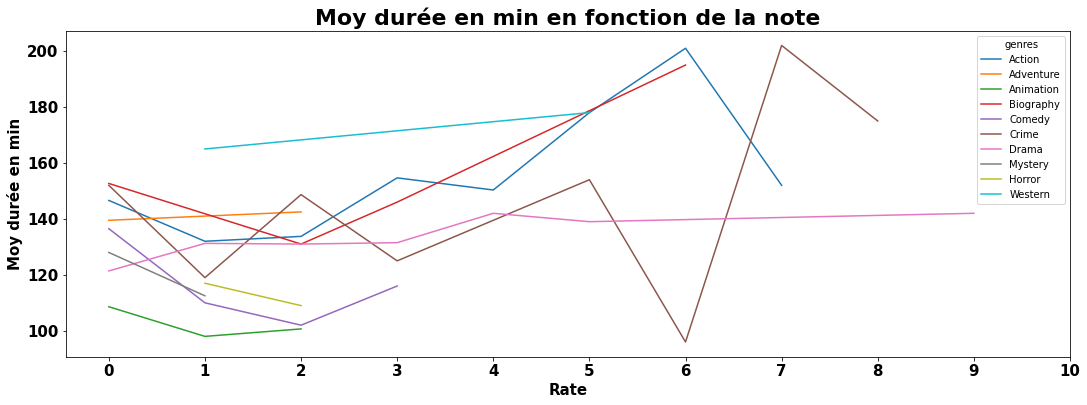

In [260]:
# avg. transaction amount at each hour for each transaction type
plt.figure(figsize=(18,6))
sns.lineplot(data=df.groupby(['rate','genres']).agg({'durée_min' : 'mean'}).round(2).reset_index(),
             x='rate',
             y='durée_min',
             hue='genres')
plt.xlabel('Rate', fontsize=15, fontweight='bold')
plt.xticks(range(11), range(11),fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Moy durée en min', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Moy durée en min en fonction de la note', fontsize=22, fontweight='bold')
plt.show()

In [262]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.scatter(df, x=df["date"], y=df["rate"],color=df["titre"])
fig.update_layout(title_text='Classement des films en fonction des dates de sortie et de leur notes')
fig.show()

In [263]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar( name='imdb',x=df["genres"].value_counts().index, y=df["genres"].value_counts().values),
    go.Bar(name='sens critique',x=df_2["genres"].value_counts().index, y=df_2["genres"].value_counts().values)
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()